In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue
from dinkum import vfg, vfn

from dinkum.display import MultiTissuePanel, tc_record_activity

import pandas as pd
from matplotlib import pyplot as plt


## Activation at multiple different levels

Building input functions with different shapes...

initializing: dinkum v0.4.1
start=1 stop=10


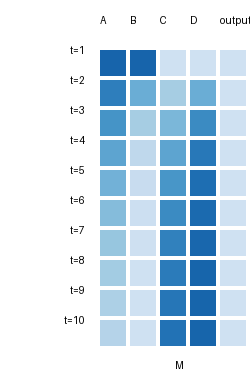

In [22]:
dinkum.reset()

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')
c = Gene(name='C')
d = Gene(name='D')

output = Gene(name='output')

def decay_fn(*, A):
    decay = 1.2
    return A.level / decay, True

def decay_fn2(*, B):
    decay = 2
    return B.level / decay, True

def growth_fn(*, C):
    growth = 1/4
    return C.level + (100 - C.level) * growth, True

def growth_fn2(*, D):
    growth = 1/2
    return D.level + (100 - D.level) * growth, True
    
a.is_present(where=m, start=1, duration=1, level=100)
b.is_present(where=m, start=1, duration=1, level=100)
c.is_present(where=m, start=1, duration=1, level=0)
d.is_present(where=m, start=1, duration=1, level=0)

a.custom_activation(state_fn=decay_fn)
b.custom_activation(state_fn=decay_fn2)
c.custom_activation(state_fn=growth_fn)
d.custom_activation(state_fn=growth_fn2)

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

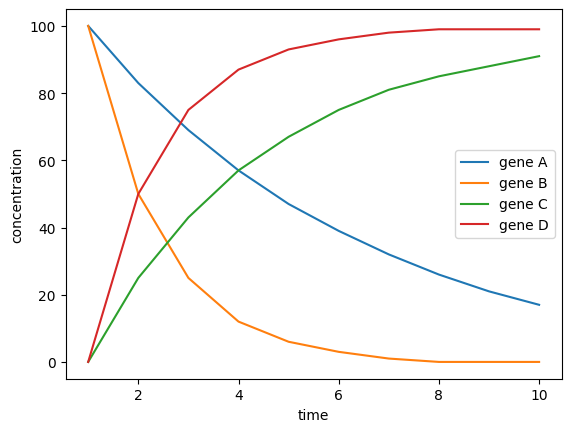

In [21]:
# now let's plot the concentrations
plt.plot(conc_df.timepoint, conc_df.A, label='gene A')
plt.plot(conc_df.timepoint, conc_df.B, label='gene B')
plt.plot(conc_df.timepoint, conc_df.C, label='gene C')
plt.plot(conc_df.timepoint, conc_df.D, label='gene D')

plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()

In [ ]:
## Connecting inputs to outputs



initializing: dinkum v0.4.1
start=1 stop=10


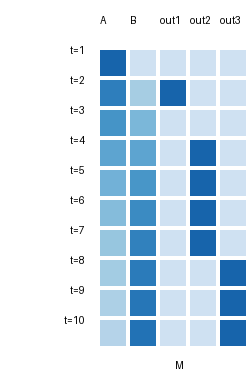

In [18]:
dinkum.reset()

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')

output1 = Gene(name='out1')
output2 = Gene(name='out2')
output3 = Gene(name='out3')

def decay_fn(*, A):
    decay = 1.2
    return A.level / decay, True

def growth_fn(*, B):
    growth = 1/4
    return B.level + (100 - B.level) * growth, True

def left(*, A, B):
    if A.level >= 80 and B.level <= 20:
        return 100, True
    else:
        return 0, False

def middle(*, A, B):
    if A.level < 80 and B.level > 20 and B.level < 80:
        return 100, True
    else:
        return 0, False

def right(*, A, B):
    if A.level < 80 and B.level > 80:
        return 100, True
    else:
        return 0, False

a.is_present(where=m, start=1, duration=1, level=100)
b.is_present(where=m, start=1, duration=1, level=0)

a.custom_activation(state_fn=decay_fn)
b.custom_activation(state_fn=growth_fn)

output1.custom_activation(state_fn=left)
output2.custom_activation(state_fn=middle)
output3.custom_activation(state_fn=right)

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

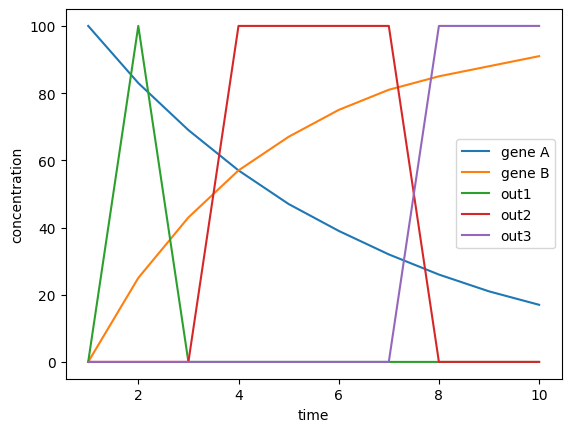

In [19]:
# now let's plot the concentrations
plt.plot(conc_df.timepoint, conc_df.A, label='gene A')
plt.plot(conc_df.timepoint, conc_df.B, label='gene B')
plt.plot(conc_df.timepoint, conc_df.out1, label='out1')
plt.plot(conc_df.timepoint, conc_df.out2, label='out2')
plt.plot(conc_df.timepoint, conc_df.out3, label='out3')

plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()